In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_polarity = pd.read_csv('polarity_socre.csv',sep='\t',encoding='utf-8')

In [3]:
df = pd.read_csv('[Final]Best_feautres_df.csv',sep='\t',encoding='utf-8')

In [4]:
df.groupby(['Credibility'])['Credibility'].count()

Credibility
0    6362
1    9942
Name: Credibility, dtype: int64

In [5]:
df1 = pd.read_csv('additional_feature_from_user_study.csv',sep='\t',encoding='utf-8')

In [6]:
Total_df = pd.merge(df,df1)

In [7]:
drop_column_list = ['Post_id', 'Blog_mobile_profile_img','Count_neighbors','Post_interval_average',
 'Text_similarity',
 'Total_post',
 'User_Id_len',
 'Comment_interaction',
 'Blog_mobile_profile_img',
 'Opening_date','Blog_info_text_len']

In [8]:
new_df = Total_df.drop(drop_column_list,axis=1)

In [9]:
new_df['Polarity'] = df_polarity['polarity'].tolist()

In [10]:
Analysis_df = new_df.fillna(0)

In [11]:
Analysis_df.to_csv('[Final]Our_feature_model.csv',sep='\t',encoding='utf-8',index=False)

# Data shuffle

In [ ]:
from sklearn.utils import shuffle
Analysis_df = shuffle(Analysis_df)

# MinMaxScaler

In [13]:
x = Analysis_df.drop(columns='Credibility',axis=1)
y = Analysis_df[['Credibility']]
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x) 

# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(x) 
X_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

## Chi-squre feature selection

In [14]:
feature_name = X_scaled.columns.tolist()

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=20)
chi2_selector.fit(X_scaled, y)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(feature_name, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores

# you can see that the kbest returned from SelectKBest 
#+ were the two features with the _highest_ score
kbest = np.asarray(feature_name)[chi2_selector.get_support()]

In [16]:
feature_dict = dict(zip(feature_name,chi2_selector.scores_))
ranking_list = reversed(sorted(feature_dict.items(), key =lambda feature_dict:feature_dict[1]))
print('Feature ranking:')
for feature in ranking_list:
    #print ('feature : %d %s (%f)' % (num+1,Feautre_list[feature[0]],feature[1]))
    print(feature[0])

Feature ranking:
FR_url
img text img text img
text img text img text
img img img img img
Sticker_count
img img img text img
text img img img img
img img img img text
img text img img img
text img img img text
img text img img text
Tag_count
Polarity
Center
img img text img img
neg_ratio
text img text img img
Right
text img img text img
subjectivity
First_ratio
Second_ratio
effort_img_ratio
Question_count
Left
img img text img text
effort_ratio
Justify
senti_diffs_per_ref
Text_len
pos_ratio


## Standard scaler

In [17]:
x = Analysis_df.drop(columns='Credibility',axis=1)
y = Analysis_df[['Credibility']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 
X_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size=0.33, random_state=42)

## Random Forest

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
print("RF :",accuracy_score(clf.predict(x_test),y_test))

RF : 0.8277271882549712


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.79      0.76      0.77      2088
          1       0.85      0.87      0.86      3293

avg / total       0.83      0.83      0.83      5381



In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_scaled, y, cv=5)
scores   

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn

array([0.77958308, 0.83507051, 0.83773006, 0.84294479, 0.81472393])

Feature ranking:
0.31527214685877747
0.15303937157556305
0.10054747920412836
0.08907890504044594
0.061318728635017986
0.05184512842026836
0.05062330995654313
0.04766129718201289
0.03592849089550014
0.033621604003984916
0.028101385115646887
0.01422373453933271
0.012358543480228046
0.00275278046948188
0.0019117017616242494
0.001715392861443991
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


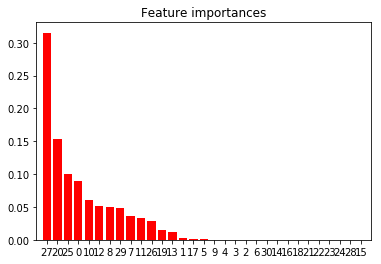

In [23]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_scaled.shape[1]):
    #print("%d. feature: %s (%f)" % (f + 1, Feautre_list[indices[f]], importances[indices[f]]))
    #print(feature_name[indices[f]])
    print(importances[indices[f]])
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Logistic Regression

In [24]:
from  sklearn  import  linear_model
logreg = linear_model.LogisticRegression(C=2.0,random_state=42,solver='sag',multi_class='multinomial',warm_start=True)
logreg.fit(x_train, y_train)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=True)

In [25]:
print("LR :",accuracy_score(logreg.predict(x_test),y_test))

LR : 0.7961345474818807


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(x_test)))

             precision    recall  f1-score   support

          0       0.75      0.72      0.73      2088
          1       0.83      0.84      0.84      3293

avg / total       0.80      0.80      0.80      5381



In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_scaled, y, cv=5)
scores         

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did n

array([0.76088289, 0.79889638, 0.76748466, 0.79754601, 0.80184049])

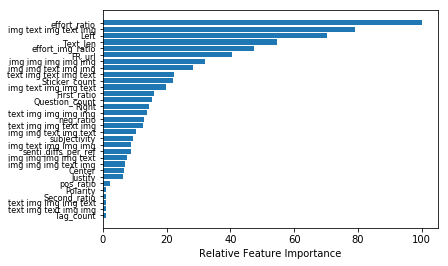

<Figure size 1080x1080 with 0 Axes>

In [35]:
import matplotlib as mpl
import matplotlib.pylab as plt

feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
f1 = plt.figure(figsize=(15,15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [38]:
pos

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5])

In [45]:
feature_dict = dict(zip(feature_name,feature_importance))
ranking_list = reversed(sorted(feature_dict.items(), key =lambda feature_dict:feature_dict[1]))
print('Feature ranking:')
num = 31

for feature in ranking_list:
    #print ('feature : %d %s (%f)' % (num+1,Feautre_list[feature[0]],feature[1]))
    print(feature[0],'\t',feature[1])

Feature ranking:
effort_ratio 	 100.0
img text img text img 	 78.98422520688368
Left 	 70.40311267204852
Text_len 	 54.46540552666291
effort_img_ratio 	 47.34688290225303
FR_url 	 40.426549876501305
img img img img img 	 31.925648446943562
img img text img img 	 28.125513914847726
text img text img text 	 22.16769932865544
Sticker_count 	 21.894697237290785
img text img img text 	 19.668778237187333
First_ratio 	 15.873298396719926
Question_count 	 15.392609324986786
Right 	 14.493015689164265
text img img img img 	 13.859539345761524
neg_ratio 	 12.726827735006152
text img img text img 	 12.593743000441885
img img text img text 	 10.308173722749215
subjectivity 	 9.536090389061993
img text img img img 	 8.888417329626568
senti_diffs_per_ref 	 8.641308875020421
img img img img text 	 7.634084282207941
img img img text img 	 6.962063528371247
Center 	 6.741607048333
Justify 	 6.3489927627935705
pos_ratio 	 2.0873008309949843
Polarity 	 1.0481430588757759
Second_ratio 	 1.045286543825562

## MLP

In [28]:
import time
from sklearn.neural_network import MLPClassifier

In [29]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=35,
    alpha=1e-4,
    solver='sgd',
    verbose=10,
    tol=1e-4,
    random_state=1,
    learning_rate_init=.1
)

In [30]:
start = time.time()
mlp_clf.fit(x_train, y_train)
end = time.time()
print('Time: {:f}s'.format(end-start))

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.46105771
Iteration 2, loss = 0.38299301
Iteration 3, loss = 0.35822309
Iteration 4, loss = 0.34045100
Iteration 5, loss = 0.33539630
Iteration 6, loss = 0.32707424
Iteration 7, loss = 0.31817668
Iteration 8, loss = 0.31056217
Iteration 9, loss = 0.30455743
Iteration 10, loss = 0.30106378
Iteration 11, loss = 0.30047924
Iteration 12, loss = 0.29090504
Iteration 13, loss = 0.29046174
Iteration 14, loss = 0.28735982
Iteration 15, loss = 0.28185230
Iteration 16, loss = 0.28083335
Iteration 17, loss = 0.27483043
Iteration 18, loss = 0.27736849
Iteration 19, loss = 0.28090845
Iteration 20, loss = 0.27059808
Iteration 21, loss = 0.26687096
Iteration 22, loss = 0.26586312
Iteration 23, loss = 0.26622140
Iteration 24, loss = 0.26594290
Iteration 25, loss = 0.26205967
Iteration 26, loss = 0.25837063
Iteration 27, loss = 0.25651262
Iteration 28, loss = 0.25673026
Iteration 29, loss = 0.25425766
Iteration 30, loss = 0.25225440
Iteration 31, loss = 0.25609173
Iteration 32, los

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
y_pred = mlp_clf.predict(x_test)
print("테스트 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))

테스트 정확도: 0.864


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83      2117
          1       0.89      0.89      0.89      3264

avg / total       0.86      0.86      0.86      5381



# OLS Regression Results

In [ ]:
import statsmodels.api as sm
x_2 = sm.add_constant(x)
est = sm.OLS(y,x_2.astype(float)).fit()

In [ ]:
print(est.summary())

In [33]:
feature_name

['FR_url',
 'Question_count',
 'First_ratio',
 'Second_ratio',
 'Tag_count',
 'Text_len',
 'senti_diffs_per_ref',
 'pos_ratio',
 'neg_ratio',
 'subjectivity',
 'Sticker_count',
 'effort_img_ratio',
 'effort_ratio',
 'img img img img img',
 'img img img img text',
 'img img img text img',
 'img img text img img',
 'img img text img text',
 'img text img img img',
 'img text img img text',
 'img text img text img',
 'text img img img img',
 'text img img img text',
 'text img img text img',
 'text img text img img',
 'text img text img text',
 'Left',
 'Center',
 'Right',
 'Justify',
 'Polarity']